# Smoothing and coordinate transformation

Smoothing and coordinate transforms are combined because they are both performed in spherical harmonics space, so we can have a single transform to and from $a_{lm}$.

Currently they are implemented as an indepent function `pysm3.apply_smoothing_and_coord_transform` which takes an input map and returns another map either smoothed or coordinate-transformed or both.
Usually it operates on maps created with `pysm3.Sky.get_emission` but it would work even with other inputs.

In [1]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
sky = pysm3.Sky(nside=128, preset_strings=["d1", "s1"])

In [3]:
map_100GHz = sky.get_emission(100 * u.GHz)

In [4]:
def plot_map(m):
    """Utility function to plot Mollweide view of a map"""
    hp.mollview(m[0], min=0, max=1e2, title="I map", unit=m.unit)

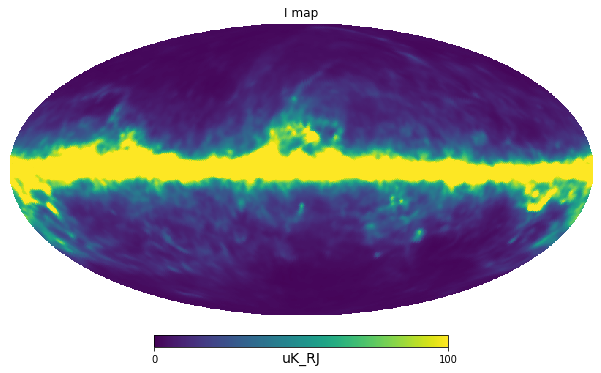

In [5]:
map_100GHz_smoothed = pysm3.apply_smoothing_and_coord_transform(map_100GHz, fwhm=2*u.deg) 
plot_map(map_100GHz_smoothed)

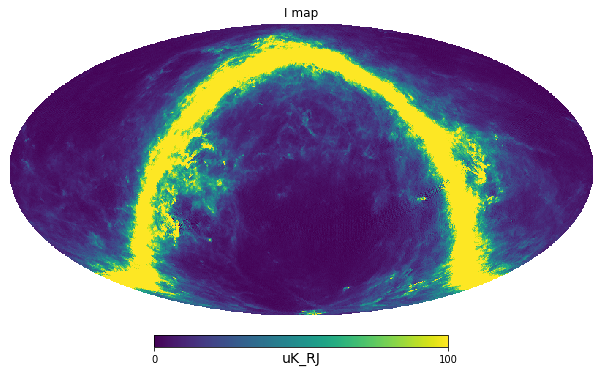

In [6]:
map_100GHz_rotated = pysm3.apply_smoothing_and_coord_transform(map_100GHz, rot=hp.Rotator(coord="GE")) 
plot_map(map_100GHz_rotated)

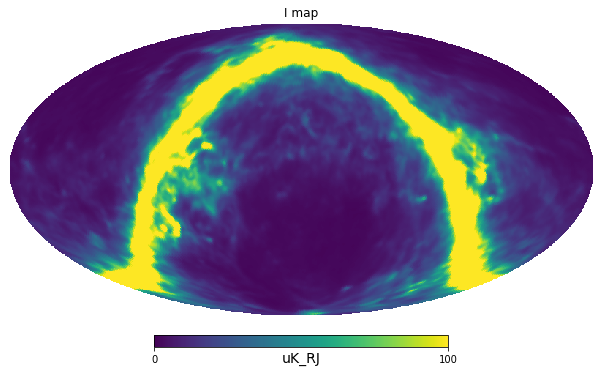

In [7]:
map_100GHz_smoothed_rotated = pysm3.apply_smoothing_and_coord_transform(map_100GHz, rot=hp.Rotator(coord="GE"), fwhm=2*u.deg)
plot_map(map_100GHz_smoothed_rotated)